In [2]:
import pandas as pd
import re

df = pd.read_csv('ratings.csv')

# Extract epoch number from strings like "td_gammon_selfplay_110000"
df['Epoch'] = df['Name'].apply(lambda x: int(re.search(r'_(\d+)$', x).group(1)))

# Sort by epoch to ensure sequential plotting
df = df.sort_values('Epoch')

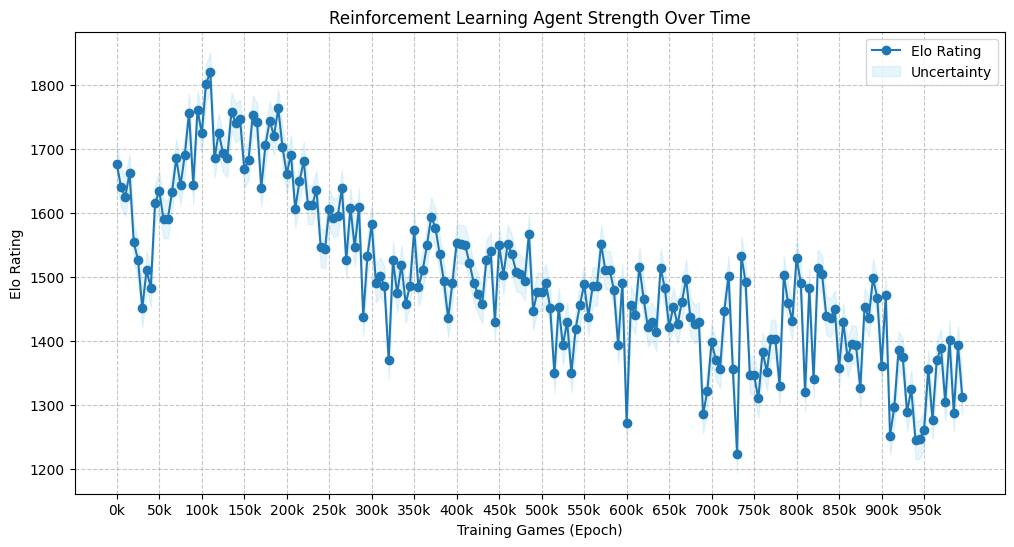

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Epoch'], df['Rating'], marker='o', linestyle='-', label='Elo Rating')

# Add uncertainty bands (optional: use alpha for transparency)
plt.fill_between(df['Epoch'], 
                 df['Rating'] - df['Uncertainty'], 
                 df['Rating'] + df['Uncertainty'], 
                 alpha=0.2, color='skyblue', label='Uncertainty')

# Formatting
plt.xlabel('Training Games (Epoch)')
plt.ylabel('Elo Rating')
plt.title('Reinforcement Learning Agent Strength Over Time')
plt.grid(True, linestyle='--', alpha=0.7)

# Improve x-axis ticks (e.g., show every 50k games)
plt.xticks(ticks=range(0, df['Epoch'].max()+1, 50000), 
           labels=[f'{x//1000}k' for x in range(0, df['Epoch'].max()+1, 50000)])

plt.legend()
plt.show()

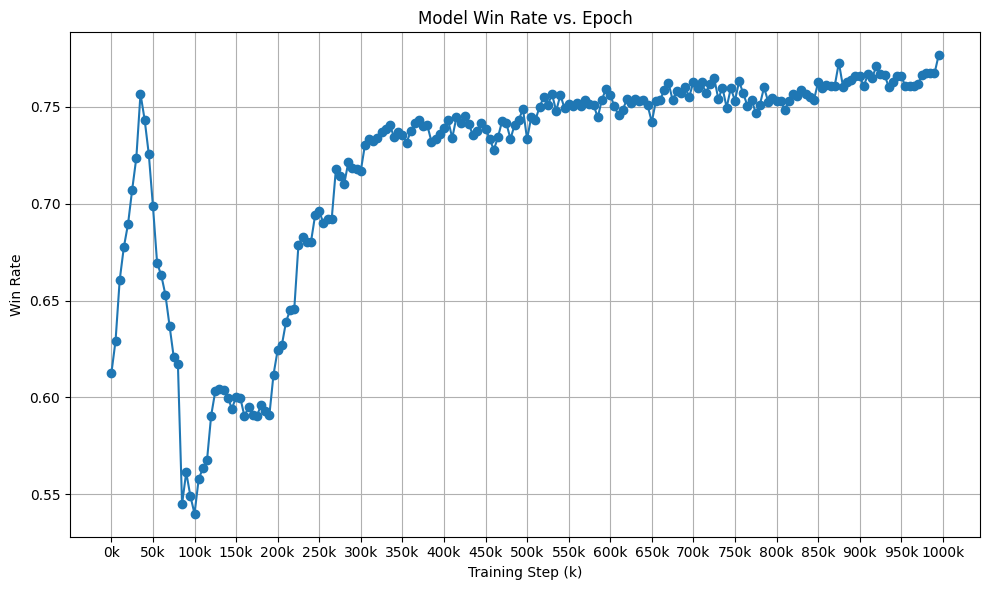

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the CSV file
df = pd.read_csv('model_win_rates.csv')  # Replace with your actual filename

# Extract epoch and convert to 'k' units
df['Epoch'] = df['Model'].apply(lambda x: int(re.search(r'_(\d+)\.pth', x).group(1)))
df = df.sort_values(by='Epoch')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'] / 1000, df['WinRate'], marker='o', linestyle='-')

# Formatting x-axis in 'k' and step of 50k
max_epoch = df['Epoch'].max()
xticks = list(range(0, (max_epoch // 50000 + 2) * 50, 50))  # Step in 50k
plt.xticks(xticks, [f"{x}k" for x in xticks])

plt.title('Model Win Rate vs. Epoch')
plt.xlabel('Training Step (k)')
plt.ylabel('Win Rate')
plt.grid(True)
plt.tight_layout()
plt.show()
